# Classifying Heart Disease

* Using the Heart Disease Data Set from the UCI Machine Learning Repository, I am going to create a logistic regression model to predict hear diseas. 
* This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual.
* You can download the dataset [here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [1]:
## reading in the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv('heart_disease.csv')
heart.head(10)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


based on the official page of the dataset:
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [2]:
#cleaning the dataset, dropping unnamed column
heart = heart.drop(columns = ['Unnamed: 0'])

In [3]:
# getting info about the variable types
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
#describing values in each column
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Feature selection

In this step, we are going to find best features that can desribe changes in our target column, ie: present

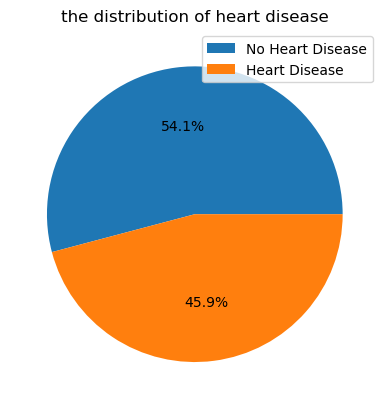

In [5]:
#finding the distribution of target column
fig, ax = plt.subplots()
heart['present'].value_counts(normalize = True).plot.pie(ax = ax, labeldistance = None, autopct = '%.1f%%')
ax.set_ylabel('')
ax.set_title('the distribution of heart disease')
ax.legend(labels=['No Heart Disease', 'Heart Disease'])
plt.show()

There's almost an equal number of cases and non-cases in the dataset.

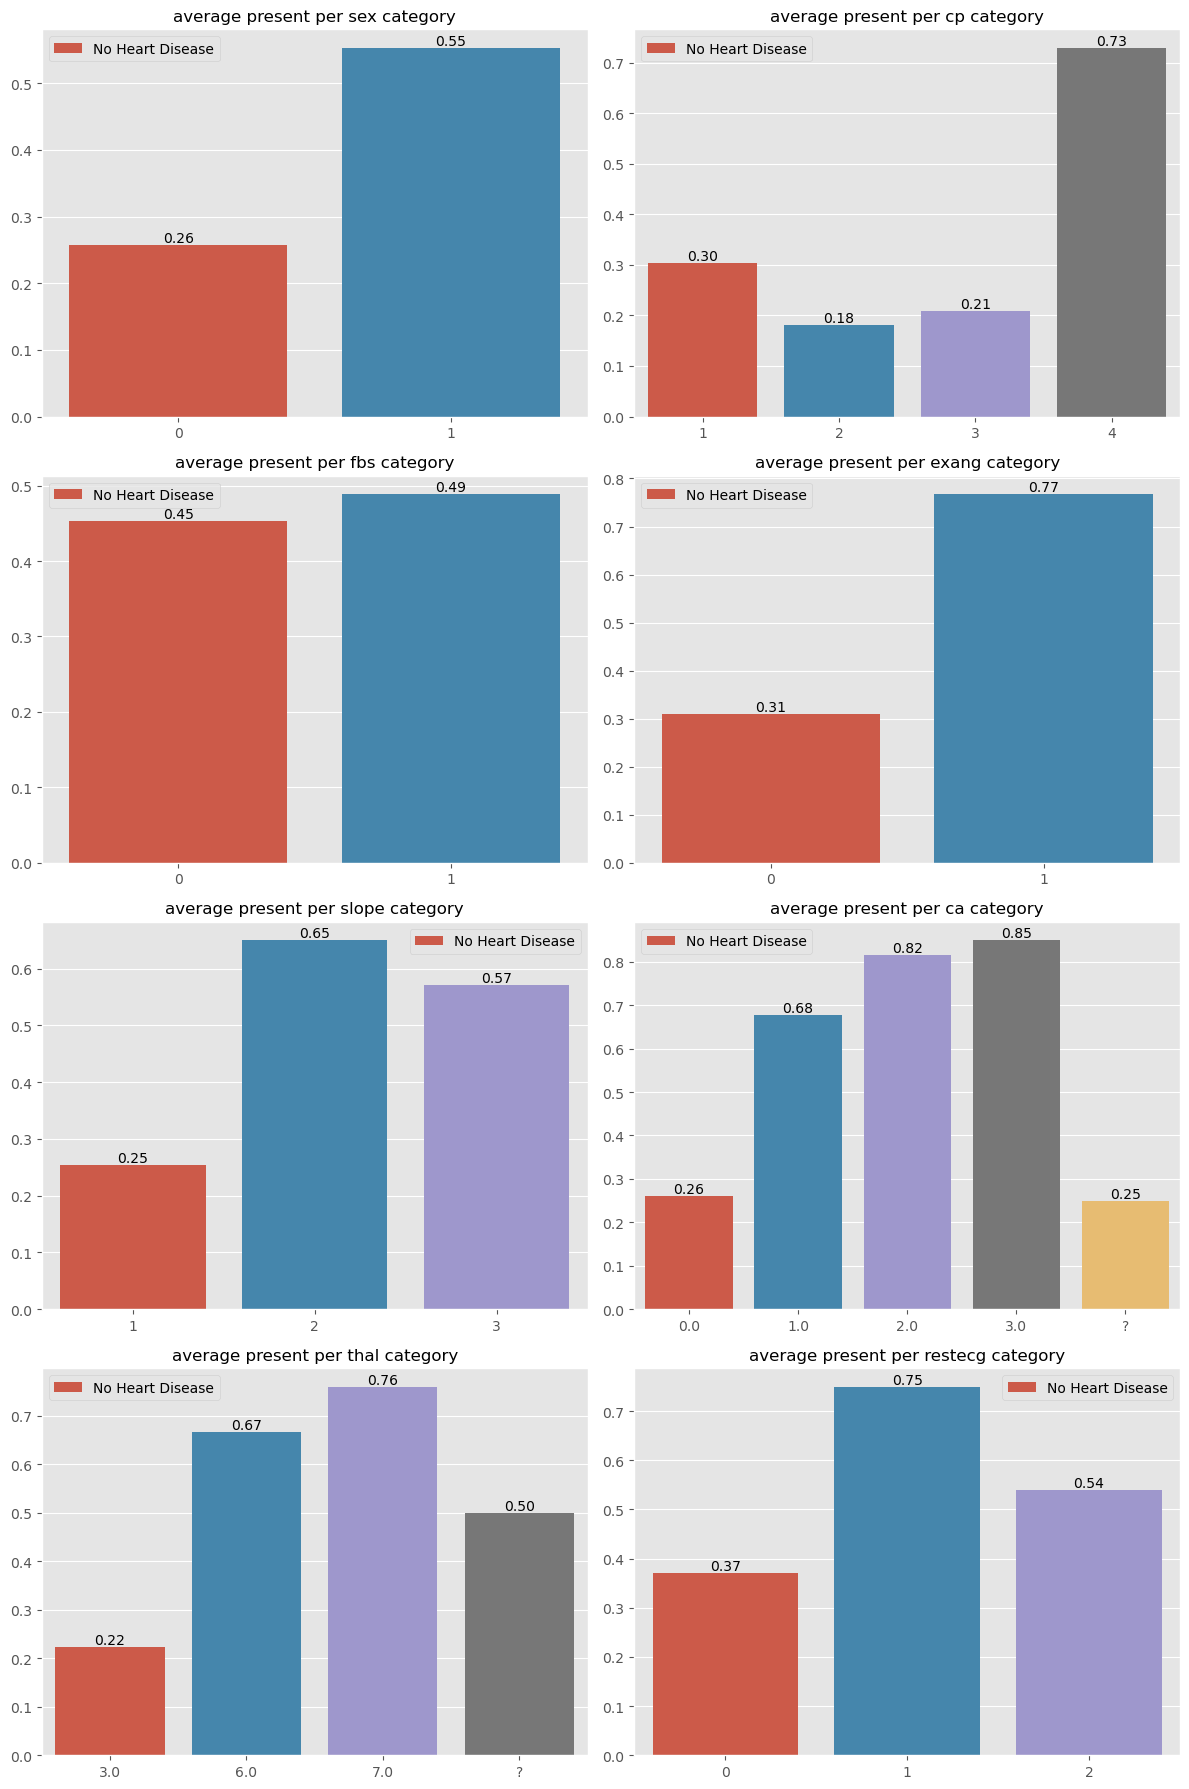

In [6]:
#creating an bar plot for categorical columns
categorical_columns = ['sex', 'cp', 'fbs','exang','slope','ca','thal','restecg']
plt.style.use('ggplot')

fig = plt.figure(figsize = (12,18))
for i,cl in enumerate(categorical_columns):
    ax = plt.subplot(4,2,i+1)
    sns.barplot(data = heart, x = cl, y = 'present', ax = ax, ci = None, order = sorted(heart[cl].unique()))
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'average present per {cl} category', fontsize = 12)
    for val in ax.containers:
        ax.bar_label(val, fmt = '%.2f')
        
    ax.legend(labels=['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()
    

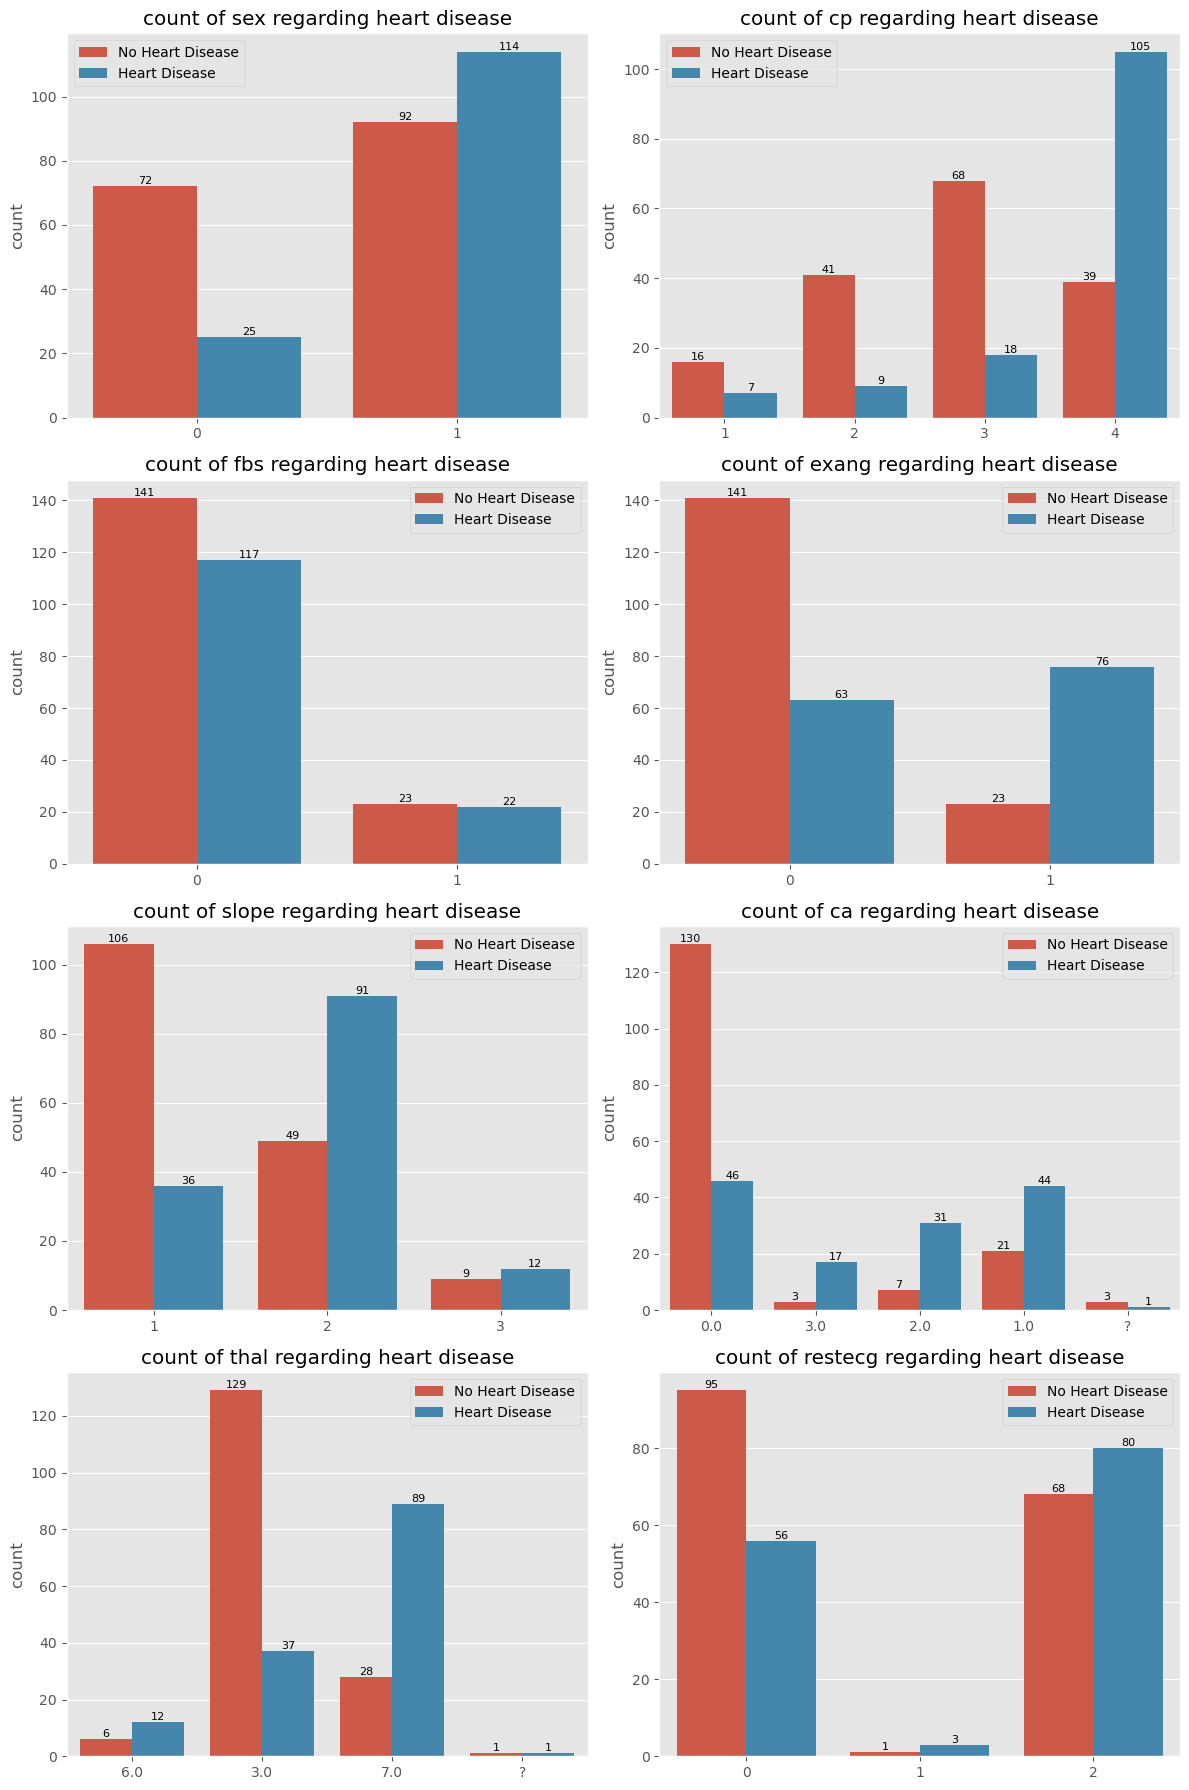

In [7]:
n_rows = 4
n_cols = 2
fig, axes = plt.subplots(n_rows,n_cols, figsize = (12,18))

for i, cl in enumerate(categorical_columns):
    row_idx = i //2 
    col_idx = i % 2
    ax = axes[row_idx][col_idx]
    sns.countplot(data = heart, x = cl, hue = 'present', ax = ax)
    ax.set_xlabel('')
    for val in ax.containers:
        ax.bar_label(val, label_type = 'edge', fontsize = 8)
    ax.legend(labels=['No Heart Disease', 'Heart Disease'])
    ax.set_title(f'count of {cl} regarding heart disease')
    
plt.tight_layout()
plt.show()

some points:
- `sex`, `cp`, `exang`, `fbs`, and `rectecg` show high values of difference regarding having or not having heart disease. As a result, they might be suitable nominates as predictors. 

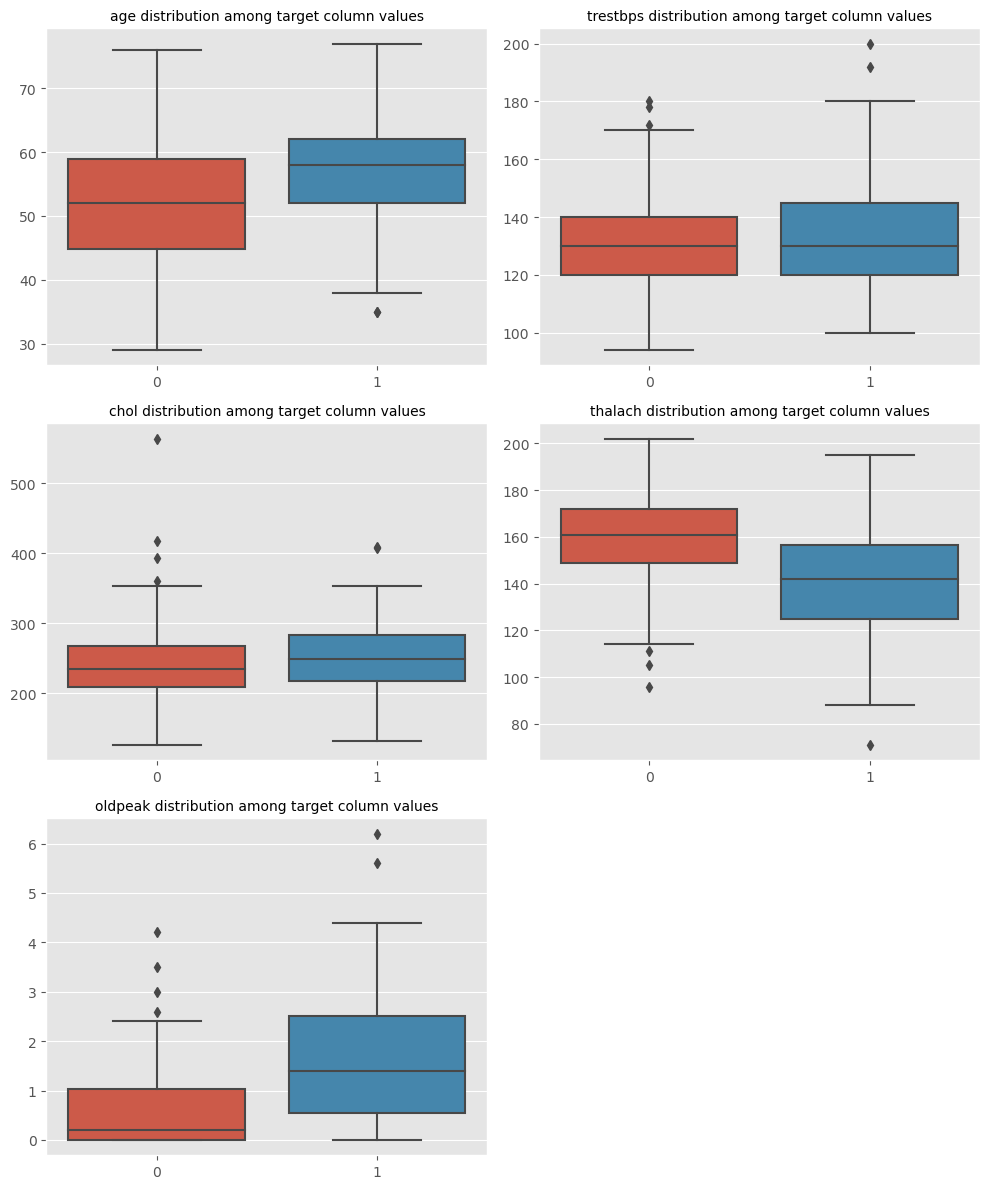

In [8]:
#creating a box plot for numerical columns
numerical_columns = ['age','trestbps','chol', 'thalach', 'oldpeak']

fig = plt.figure(figsize = (10,12))

for i,cl in enumerate(numerical_columns):
    ax = fig.add_subplot(3,2,i+1)
    sns.boxplot(data = heart, x = 'present', y = cl, ax = ax)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'{cl} distribution among target column values', fontsize = 10)
    
plt.tight_layout()
plt.show()
    

- `age` and `thalach` show noticable differences regarding having or not having heart disease. 

### selected columns
The list of selected columns is

In [9]:
selected_cols = ['age', 'thalach', 'sex', 'cp', 'exang', 'fbs', 'restecg']

## Dividing the data

In [10]:
#creating test and train sets
from sklearn.model_selection import train_test_split
X = heart[selected_cols]
y = heart['present']

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 33)

In [11]:
#making sure both train and test sets include case and non cases
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.580189
1    0.419811
Name: present, dtype: float64
1    0.549451
0    0.450549
Name: present, dtype: float64


Based on the results, we can verify that both the training and test datasets contain both cases and non-cases.

## Building the model

In [12]:
#building a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500) #setting max_iter to avoid ConvergenceWarning
model.fit(X_train, y_train)
model.n_iter_[0]

127

model's training accuracy is 0.76


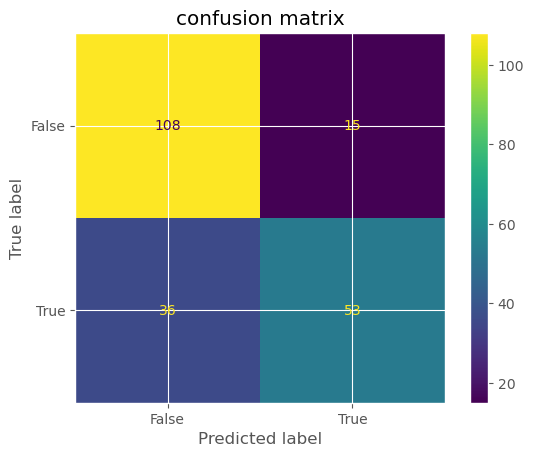

In [13]:
#calculating model's performance metrics using training sets:
y_pred_train = model.predict(X_train)

#accuracy
acc_train = model.score(X_train, y_train)
print(f"model's training accuracy is {acc_train:.2f}")

#creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmx = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cmx, display_labels = [False, True]).plot()
plt.title('confusion matrix')
plt.show()

In [14]:
#finding training sensitivity and specifity of the model
tp = 53
fn = 36
tn = 108
fp = 15

sens_train = tp / (tp + fn)
spec_train = tn / (tn + fp)

print(f"model's training sensitivity is {sens_train:.2f}")
print(f"model's training specifity is {spec_train:.2f}")
print(f"model's training accuracy is {acc_train:.2f}")

model's training sensitivity is 0.60
model's training specifity is 0.88
model's training accuracy is 0.76


Overal, model's accuracy is 76%. its sensitivity is 60% and specifity is 88%.The model performs better for **non-cases**.

# Model coefficients

The logistic regression relates the binary outcome to the linear combination of predictors via the link function:
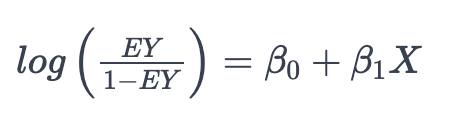

The predictors affect the outcome on the log-odds scale. The non-intercept coefficients represent the log-odds ratio for a unit increase in a predictor:

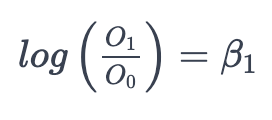

In [15]:
#finding the coefficients of the model on log-odds and odds scale:
coefs = model.coef_[0]
list_of_coefs = list()
for cl, cf in zip(selected_cols, coefs):
    row = [cl, round(cf,3), round(np.exp(cf),3),round(np.exp(cf) / (np.exp(cf) + 1),3) ]
    list_of_coefs.append(row)

coefs_df = pd.DataFrame(list_of_coefs, columns = ['feature', 'log_odds', 'odds', 'EY'])
coefs_df

,feature,log_odds,odds,EY
0,age,0.033,1.033,0.508
1,thalach,-0.023,0.977,0.494
2,sex,1.176,3.242,0.764
3,cp,0.584,1.793,0.642
4,exang,1.018,2.766,0.734
5,fbs,0.060,1.062,0.515
6,restecg,0.326,1.386,0.581


Interpreting results:
The log-odds shows EY/1-EY, where EY is the probability of having heart disease in this context. if this value is above 1, it shows than while adjusting(controlling) for other variables, each one unit increase in that feature results in an increase in happening a case situation. 
- with each unit increase in `age`, `sex`, `cp`, `exang`, `fbs` and `restecg` (considering they happen one-by-one while controlling the effect of other variables) the chance of having heart disease increases. It makes sense since we saw in the charts at the begining that male(sex=1), higher ages, higher cp, exang, fbs and restecg values showed higher levels of having heart disease. 

- the only predictor that shows a decrease in the chance of having heart disease while increases is `thalach`(maximum heart rate achieved), which showed a decrease in its distribution for those who had heart disease. As a result, this predictor makes sense:


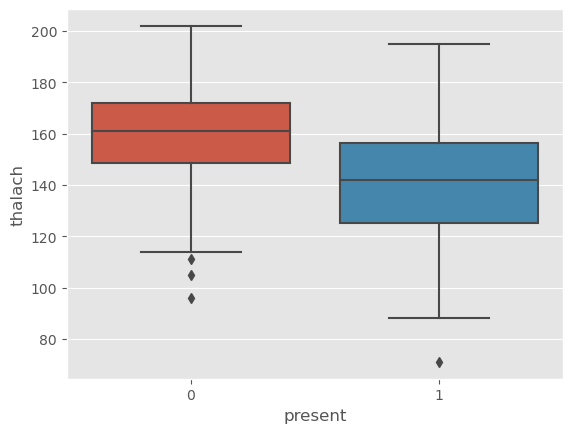

In [16]:
sns.boxplot(data = heart, x = 'present', y = 'thalach')
plt.show()

## Final model evaluation

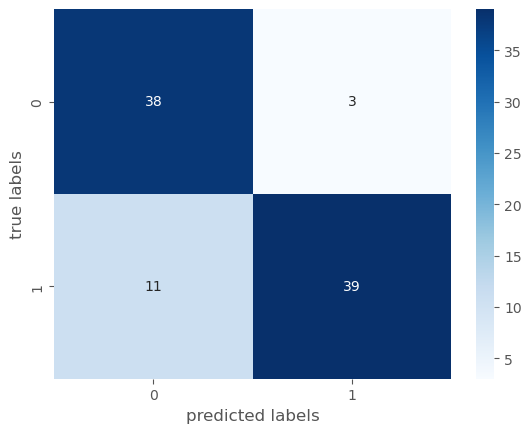

In [17]:
#finding the y_pred
y_pred = model.predict(X_test)

#finding the accuracy and confusion matrix
cm_test = confusion_matrix(y_test,y_pred)
acc_test = model.score(X_test, y_test)

sns.heatmap(cm_test, annot = True, cmap = 'Blues')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

In [18]:
tp = 39
tn = 38
fn = 11
fp = 3

sens_test = tp / (tp + fn)
spec_test = tn / (tn + fp)


print(f"model's sensitivity is {sens_test:.2f}")
print(f"model's specifity is {spec_test:.2f}")
print(f"model's accuracy is {acc_test:.2f}")

model's sensitivity is 0.78
model's specifity is 0.93
model's accuracy is 0.85


Model's performance is better in predicting non-case observations(it it better in predicting not-having heart disease).

## Conclusion
- the model performs better in predicting non-cases.
- it has an acceptable accuracy score equal to 85%, ie, the model built during this notebook can predict 85% of total observations correctly.
- A higher value of max. acheived heart rate achieved shows lower chances of having heart diseases.
- Oldsters and males are more prone to having heart disease in comparison to the youngs and females. 